In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv(r"spam.csv",encoding='cp1252')

In [13]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,0,ok lar... joking wif u oni...,NaN,NaN,NaN
2,1,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,0,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,0,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

In [15]:
df.isnull().sum()

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [16]:
df = df.iloc[: , [0,1]]


In [17]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [18]:
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [19]:
df.rename(columns= {"v1" : "label" , "v2" :"message"} , inplace = True) 


In [20]:
df.label.replace({"ham":0, "spam":1} , inplace = True )


In [21]:
df.message   = df.message.str.lower()


In [22]:
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [23]:
from  nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
stopwords.words("english") 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
len(stopwords.words('english'))

179

In [27]:
import string  
string.punctuation 


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
abc = " i want to ? remove !! all the ... punctuation marks $ from %%"

In [29]:
abc_refined=[i for i in abc if i not  in string.punctuation]

In [30]:
abc_refined

[' ',
 'i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's',
 ' ',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ']

In [31]:
abc_refined = "".join(abc_refined)

In [32]:
abc_refined

' i want to  remove  all the  punctuation marks  from '

In [33]:
abc_refined.split()

['i', 'want', 'to', 'remove', 'all', 'the', 'punctuation', 'marks', 'from']

In [34]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [35]:
df['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
5       [freemsg, hey, darling, 3, weeks, word, back, ...
6       [even, brother, like, speak, treat, like, aids...
7       [per, request, melle, melle, oru, minnaminungi...
8       [winner, valued, network, customer, selected, ...
9       [mobile, 11, months, u, r, entitled, update, l...
10      [im, gonna, home, soon, dont, want, talk, stuf...
11      [six, chances, win, cash, 100, 20000, pounds, ...
12      [urgent, 1, week, free, membership, å£100000, ...
13      [ive, searching, right, words, thank, breather...
14                                         [date, sunday]
15      [xxxmobilemovieclub, use, credit, click, wap, ...
16                                    [oh, kim, watching]
17      [eh, u

In [36]:
from sklearn.feature_extraction.text import CountVectorizer ## will give the count of each and every word
bow_transformer = CountVectorizer(analyzer = text_process ).fit(df["message"])

In [37]:
bow_transformer.vocabulary_

{'go': 3748,
 'jurong': 4644,
 'point': 6376,
 'crazy': 2463,
 'available': 1375,
 'bugis': 1840,
 'n': 5624,
 'great': 3845,
 'world': 9107,
 'la': 4803,
 'e': 2988,
 'buffet': 1838,
 'cine': 2178,
 'got': 3805,
 'amore': 1142,
 'wat': 8870,
 'ok': 5940,
 'lar': 4842,
 'joking': 4612,
 'wif': 9003,
 'u': 8534,
 'oni': 5972,
 'free': 3539,
 'entry': 3123,
 '2': 415,
 'wkly': 9059,
 'comp': 2294,
 'win': 9017,
 'fa': 3261,
 'cup': 2518,
 'final': 3385,
 'tkts': 8311,
 '21st': 435,
 'may': 5287,
 '2005': 422,
 'text': 8150,
 '87121': 838,
 'receive': 6774,
 'questionstd': 6665,
 'txt': 8518,
 'ratetcs': 6718,
 'apply': 1228,
 '08452810075over18s': 72,
 'dun': 2974,
 'say': 7129,
 'early': 2995,
 'hor': 4175,
 'c': 1889,
 'already': 1116,
 'nah': 5631,
 'dont': 2882,
 'think': 8224,
 'goes': 3762,
 'usf': 8664,
 'lives': 5004,
 'around': 1279,
 'though': 8243,
 'freemsg': 3547,
 'hey': 4071,
 'darling': 2582,
 '3': 520,
 'weeks': 8923,
 'word': 9093,
 'back': 1426,
 'id': 4294,
 'like': 4

In [38]:
len(bow_transformer.vocabulary_)

9431

In [39]:
df_bow=bow_transformer.transform(df.message)

In [40]:
df_bow.shape

(5572, 9431)

In [41]:
type(df_bow)

scipy.sparse.csr.csr_matrix

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test,y_train,y_test=train_test_split(df_bow,df.label,test_size=.2)

In [44]:
x_train.shape

(4457, 9431)

In [45]:
y_train.shape

(4457,)

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
nb = MultinomialNB()

In [48]:
nb.fit(x_train,y_train)

MultinomialNB()

In [49]:
pred_df_bow_nb=nb.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
tab_df_bow_nb=confusion_matrix(pred_df_bow_nb,y_test)
tab_df_bow_nb

array([[967,  10],
       [ 16, 122]], dtype=int64)

In [51]:
tab_df_bow_nb.diagonal().sum()/tab_df_bow_nb.sum()*100

97.66816143497758

In [52]:
from wordcloud import WordCloud

In [53]:
pip install wordcloud

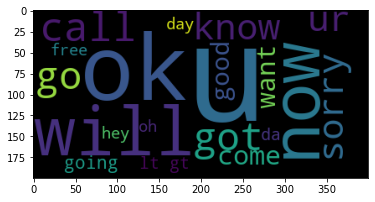

In [54]:
from wordcloud import WordCloud

cloud = WordCloud(max_words=20).generate(str(df['message']))
plt.imshow(cloud)

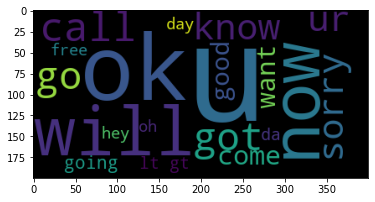

In [55]:
plt.imshow(cloud)

In [56]:
df1_ham=df[df.label==0]

In [57]:
df1_spam=df[df.label==1]

In [58]:
df1_ham.shape

(4825, 2)

In [59]:
df1_spam.shape

(747, 2)

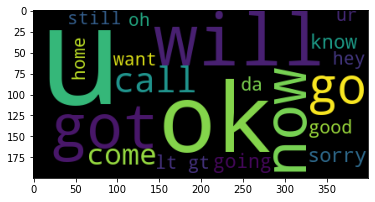

In [60]:
cloud = WordCloud( max_words=20).generate(str(df1_ham['message']) )
plt.imshow(cloud) ## creating word cloud only in the ham records

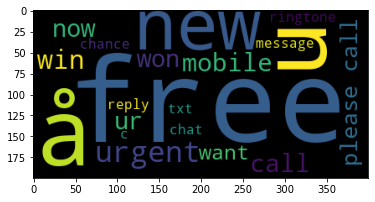

In [61]:
cloud = WordCloud( max_words=20).generate(str(df1_spam['message']) )
plt.imshow(cloud)